#DATA EXPLORATION

In [ ]:
import pandas as pd

# Load the dataset
tornado_df = pd.read_csv("/content/Historical_Tornado_Tracks.csv")

# Check the number of rows and columns
num_rows, num_columns = tornado_df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

# Preview the first few rows
print("\nPreview of the first few rows:")
print(tornado_df.head())

# View column names
print("\nColumn names:")
print(tornado_df.columns)


Number of rows: 57988
Number of columns: 24

Preview of the first few rows:
   index   FID     OM    YR   MO    DY       DATE      TIME  TZ  ST  ...  FAT  \
0      0  2001  141.0  2002  6.0   5.0   6/5/2002  16:45:00   3  FL  ...    0   
1      1  2002  142.0  2002  6.0   8.0   6/8/2002  13:40:00   3  FL  ...    0   
2      2  2003  145.0  2002  6.0  17.0  6/17/2002  16:40:00   3  FL  ...    0   
3      3  2004  187.0  2002  7.0  11.0  7/11/2002  12:30:00   3  FL  ...    0   
4      4  2005  188.0  2002  7.0  12.0  7/12/2002   6:30:00   3  FL  ...    0   

    LOSS  CLOSS   SLAT   SLON   ELAT   ELON  LEN   WID  Shape_Leng  
0  0.000    0.0  28.08 -82.78  28.08 -82.78  0.1  20.0    0.000000  
1  0.500    0.0  27.73 -82.73  27.72 -82.75  1.0  40.0    0.022361  
2  0.000    0.0  27.48 -82.72  27.48 -82.72  0.1  20.0    0.000000  
3  0.020    0.0  27.77 -82.77  27.77 -82.77  0.5  40.0    0.000000  
4  0.001    0.0  27.92 -82.80  27.92 -82.80  0.5  40.0    0.000000  

[5 rows x 24 columns]


#DATA CLEANING

In [ ]:
import pandas as pd

# Load the dataset
tornado_df = pd.read_csv("/content/Historical_Tornado_Tracks.csv")

# Handling missing values
missing_values = tornado_df.isnull().sum()
print("Missing values:\n", missing_values)

# Option 1: Remove rows with missing values
tornado_df_cleaned = tornado_df.dropna()


# Removing duplicates
num_duplicates = tornado_df.duplicated().sum()
print("Number of duplicates:", num_duplicates)

# Remove duplicates
tornado_df_cleaned = tornado_df.drop_duplicates()


# After cleaning
print("Shape of cleaned dataset:", tornado_df_cleaned.shape)
print("Preview of cleaned dataset:")
print(tornado_df_cleaned.head())


Missing values:
 index         0
FID           0
OM            3
YR            0
MO            3
DY            3
DATE          0
TIME          2
TZ            0
ST            2
STF           4
STN           4
MAG           2
INJ           3
FAT           0
LOSS          1
CLOSS         0
SLAT          3
SLON          3
ELAT          3
ELON          0
LEN           2
WID           4
Shape_Leng    3
dtype: int64
Number of duplicates: 0
Shape of cleaned dataset: (57988, 24)
Preview of cleaned dataset:
   index   FID     OM    YR   MO    DY       DATE      TIME  TZ  ST  ...  FAT  \
0      0  2001  141.0  2002  6.0   5.0   6/5/2002  16:45:00   3  FL  ...    0   
1      1  2002  142.0  2002  6.0   8.0   6/8/2002  13:40:00   3  FL  ...    0   
2      2  2003  145.0  2002  6.0  17.0  6/17/2002  16:40:00   3  FL  ...    0   
3      3  2004  187.0  2002  7.0  11.0  7/11/2002  12:30:00   3  FL  ...    0   
4      4  2005  188.0  2002  7.0  12.0  7/12/2002   6:30:00   3  FL  ...    0   

    LOSS 

#MISSING VALUE TREATMENT

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Historical_Tornado_Tracks.csv'
df = pd.read_csv(file_path)

# Display the initial number of rows and columns
print(f"Initial shape: {df.shape}")

# Drop rows with any missing values
df_dropna = df.dropna()
print(f"Shape after dropping rows with missing values: {df_dropna.shape}")

# Fill missing values with the mean of their respective columns
numeric_cols = df.select_dtypes(include=['number']).columns
df_fillna_mean = df.copy()
df_fillna_mean[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print(f"Shape after filling missing values with mean: {df_fillna_mean.shape}")


Initial shape: (57988, 24)
Shape after dropping rows with missing values: (57962, 24)
Shape after filling missing values with mean: (57988, 24)


#SUMMARY STATISTICS

In [ ]:
import pandas as pd

# Load the dataset
tornado_df = pd.read_csv("/content/Historical_Tornado_Tracks.csv")

# Select only numerical columns
numerical_cols = ['MAG', 'INJ', 'FAT', 'LOSS', 'CLOSS', 'LEN', 'WID']

# Calculate mean, median, and mode
mean_values = tornado_df[numerical_cols].mean()
median_values = tornado_df[numerical_cols].median()
mode_values = tornado_df[numerical_cols].mode().iloc[0]  # Mode returns a DataFrame, so we extract the first row

# Display mean values
print("\nMean Values:")
print(mean_values)

# Display median values
print("\nMedian Values:")
print(median_values)

# Display mode values
print("\nMode Values:")
print(mode_values)

import pandas as pd

# Load the dataset
tornado_df = pd.read_csv("/content/Historical_Tornado_Tracks.csv")

# Ensure 'MAG' column exists and is numeric
if 'MAG' in tornado_df.columns:
    tornado_df['MAG'] = pd.to_numeric(tornado_df['MAG'], errors='coerce')
else:
    raise KeyError("Column 'MAG' not found in the dataset")

# Exclude zero values in the 'MAG' column for summary statistics
filtered_tornado_df = tornado_df[tornado_df['MAG'] != 0]

# Calculate mean, median, and mode for the 'MAG' column with zero values excluded
mean_mag = filtered_tornado_df['MAG'].mean()
median_mag = filtered_tornado_df['MAG'].median()
mode_mag = filtered_tornado_df['MAG'].mode().iloc[0] if not filtered_tornado_df['MAG'].mode().empty else None

print(f"Mean of MAG (excluding zero values): {mean_mag}")
print(f"Median of MAG (excluding zero values): {median_mag}")
print(f"Mode of MAG (excluding zero values): {mode_mag}")




Mean Values:
MAG       0.796106
INJ       1.592205
FAT       0.099055
LOSS      2.220712
CLOSS     0.001905
LEN       3.493036
WID      96.565035
dtype: float64

Median Values:
MAG       1.00
INJ       0.00
FAT       0.00
LOSS      0.12
CLOSS     0.00
LEN       0.50
WID      40.00
dtype: float64

Mode Values:
MAG       0.0
INJ       0.0
FAT       0.0
LOSS      0.0
CLOSS     0.0
LEN       0.1
WID      10.0
Name: 0, dtype: float64
Mean of MAG (excluding zero values): 1.4744322718707081
Median of MAG (excluding zero values): 1.0
Mode of MAG (excluding zero values): 1.0


#DATA VISUALIZATION

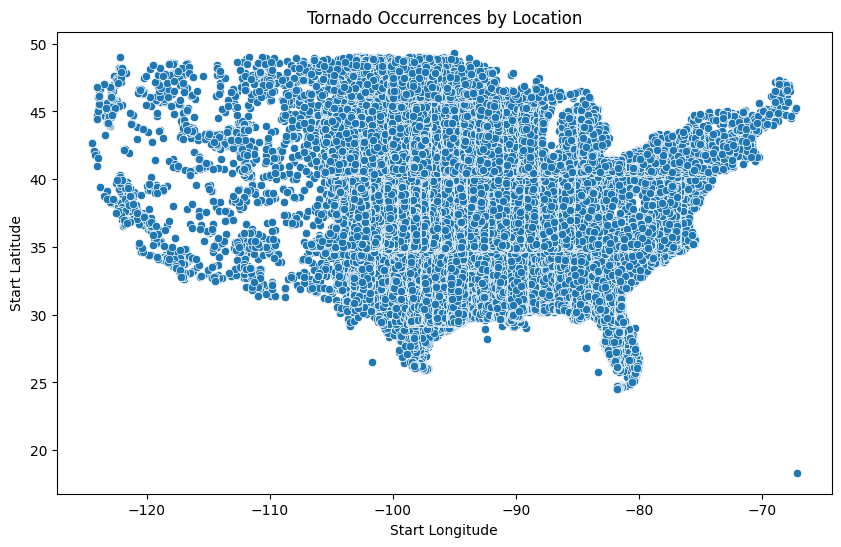

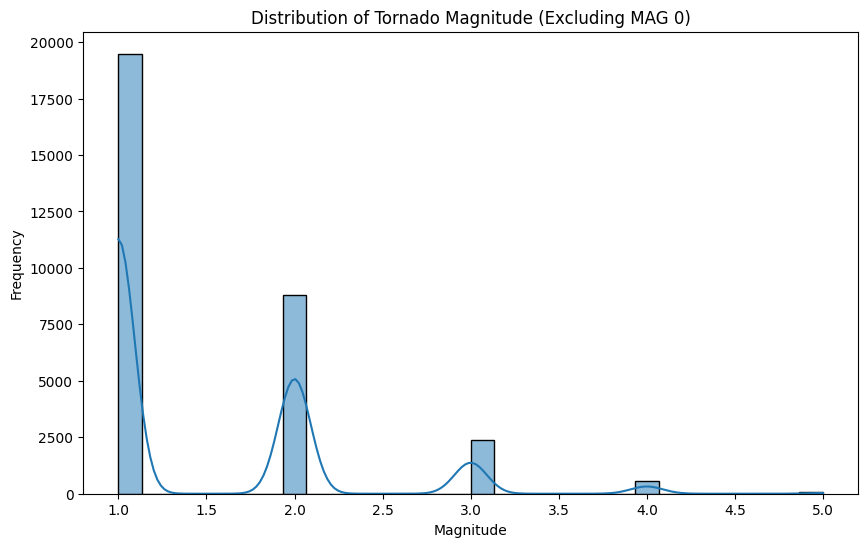

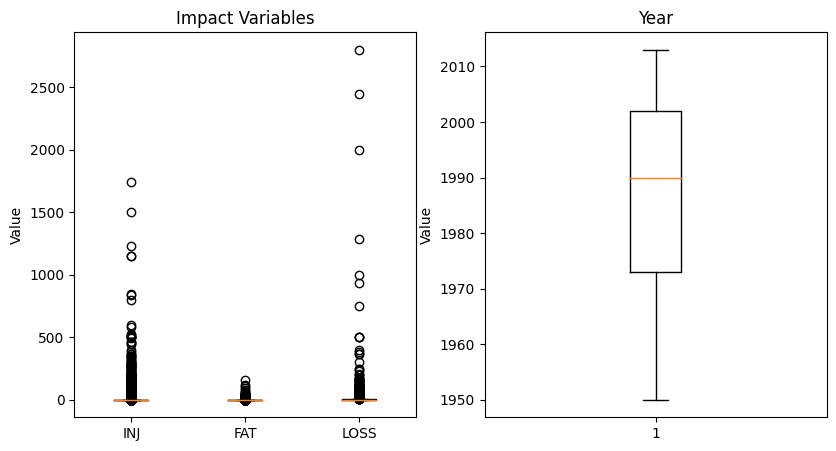

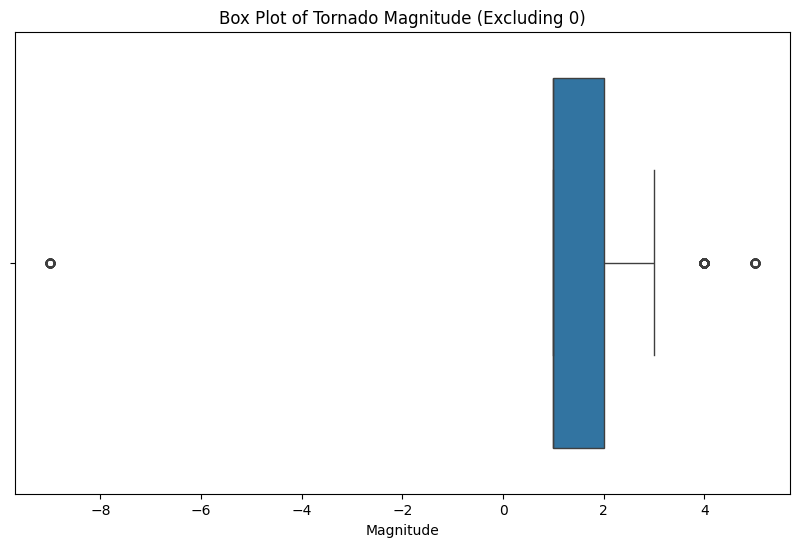

<Figure size 640x480 with 0 Axes>

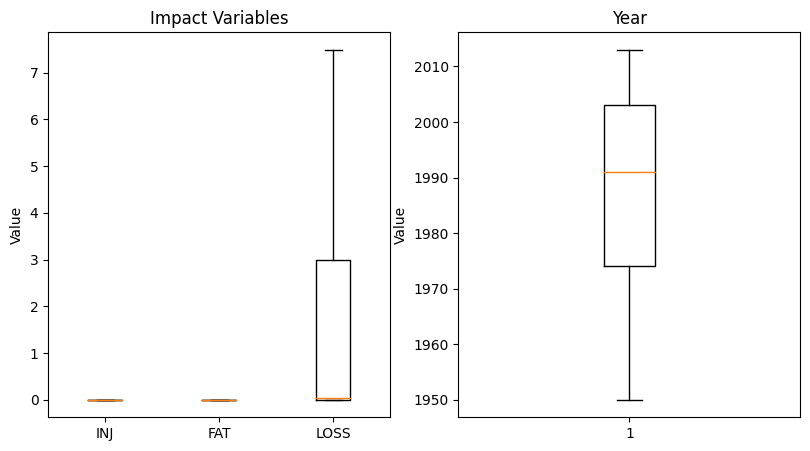

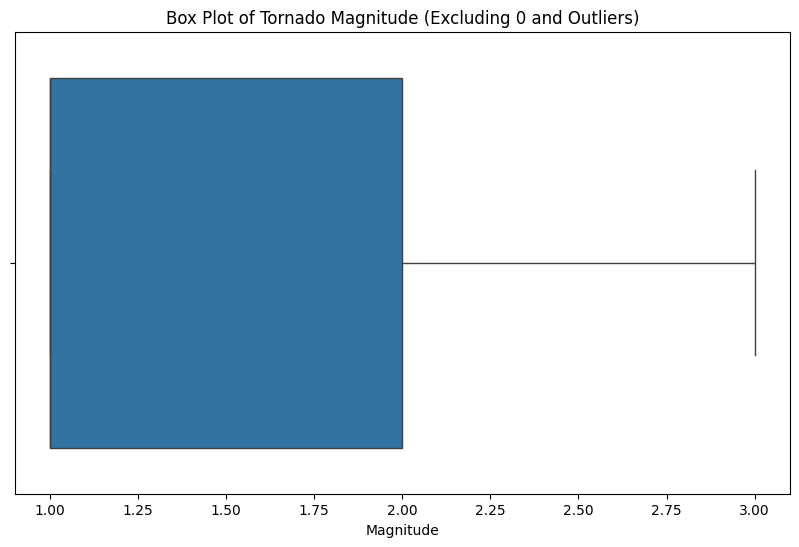

<Figure size 640x480 with 0 Axes>

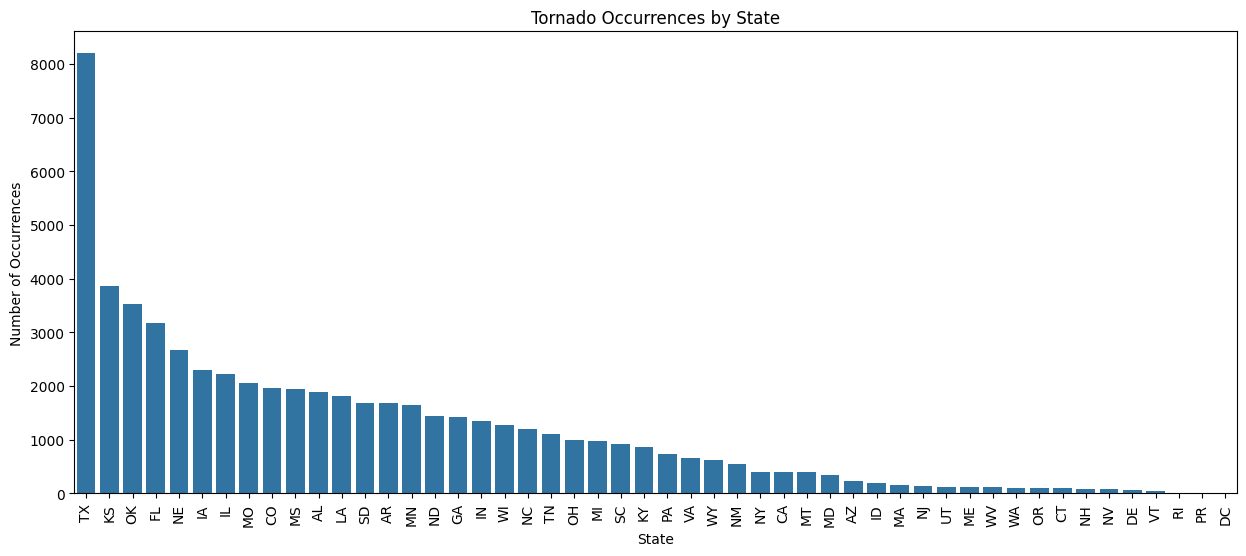

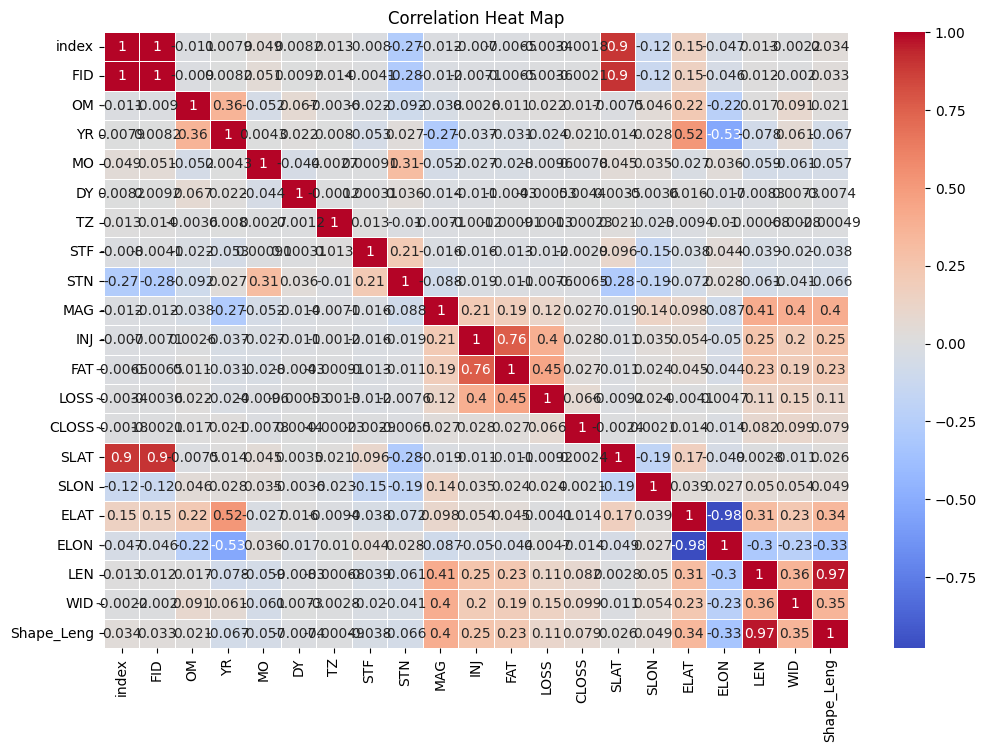

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
tornado_df = pd.read_csv("/content/Historical_Tornado_Tracks.csv")

# Scatter plot for tornado occurrences by location
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SLON', y='SLAT', data=tornado_df)
plt.title('Tornado Occurrences by Location')
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')
plt.show()

# Histogram for tornado severity (magnitude)

# Exclude rows where MAG is 0
filtered_df = tornado_df[tornado_df['MAG'] > 0]

# Plot histogram for tornado severity (magnitude)
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['MAG'], bins=30, kde=True)
plt.title('Distribution of Tornado Magnitude (Excluding MAG 0)')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()



# Impact Variables Box Plot
impact_vars = ['INJ', 'FAT', 'LOSS']
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.boxplot(data[impact_vars].dropna())
plt.title('Impact Variables')
plt.xticks(range(1, len(impact_vars) + 1), impact_vars)
plt.ylabel('Value')

# Year Box Plot
plt.subplot(1, 3, 2)
plt.boxplot(data['YR'].dropna())
plt.title('Year')
plt.ylabel('Value')


import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where MAG is not equal to 0
filtered_tornado_df = tornado_df[tornado_df['MAG'] != 0]

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='MAG', data=filtered_tornado_df)
plt.title('Box Plot of Tornado Magnitude (Excluding 0)')
plt.xlabel('Magnitude')
plt.show()



plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/Historical_Tornado_Tracks.csv')

# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for impact variables
impact_vars = ['INJ', 'FAT', 'LOSS']
data_no_outliers = data.copy()
for var in impact_vars:
    data_no_outliers = remove_outliers(data_no_outliers, var)

# Create a figure for impact variables box plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.boxplot([data_no_outliers[var].dropna() for var in impact_vars], labels=impact_vars)
plt.title('Impact Variables')
plt.ylabel('Value')

# Remove outliers for Year
data_no_outliers_year = remove_outliers(data_no_outliers, 'YR')

# Year Box Plot
plt.subplot(1, 3, 2)
plt.boxplot(data_no_outliers_year['YR'].dropna())
plt.title('Year')
plt.ylabel('Value')

# Filter out rows where MAG is not equal to 0
filtered_tornado_df = data_no_outliers[data_no_outliers['MAG'] != 0]

# Remove outliers for Magnitude
filtered_tornado_df_no_outliers = remove_outliers(filtered_tornado_df, 'MAG')

# Create the box plot for Magnitude excluding zero values and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='MAG', data=filtered_tornado_df_no_outliers)
plt.title('Box Plot of Tornado Magnitude (Excluding 0 and Outliers)')
plt.xlabel('Magnitude')
plt.show()

plt.tight_layout()
plt.show()

# Bar chart for tornado occurrences per state
plt.figure(figsize=(15, 6))
state_counts = tornado_df['ST'].value_counts()
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title('Tornado Occurrences by State')
plt.xlabel('State')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90)
plt.show()


# Heat map for correlation between numeric variables
plt.figure(figsize=(12, 8))
numeric_df = tornado_df.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heat Map')
plt.show()


#EDA report including visualizations and insights gained from the dataset.
1.Tornado Occurrences by Location:
A scatter plot showing the geographical distribution of tornado occurrences based on their starting latitude and longitude.
Insights:
Tornado occurrences are concentrated in specific regions, indicating tornado-prone areas.
2. Distribution of Tornado Magnitude
A histogram to visualize the distribution of tornado magnitudes, excluding rows where magnitude is 0.
Insights:
The distribution shows a right-skewed pattern with most tornadoes having a lower magnitude.
3. Impact Variables Box Plot
Box plots to visualize the distribution of impact variables (INJ, FAT, LOSS) after removing outliers
Insights:
The impact variables exhibit significant outliers, indicating variability in tornado impacts
4. Tornado Magnitude Box Plot (Excluding 0 and Outliers)
Box plot for tornado magnitude, excluding zero values and outliers.
Insights:
The box plot shows the central tendency and spread of tornado magnitudes, with fewer extreme values after outlier removal
5. Tornado Occurrences by State
A bar chart showing the number of tornado occurrences per state.
Insights:
Certain states have a higher frequency of tornado occurrences, highlighting regions that may need more robust tornado preparedness measures.
6. Correlation Heat Map
A heat map to visualize the correlation between numeric variables in the dataset.
Insights:
The heat map shows the correlation between different numeric variables, providing insights into how these variables interact with each other.

#DATA TRANSFORMATION

In [ ]:
import pandas as pd
import numpy as np  # Add this import statement
from sklearn.preprocessing import StandardScaler

# Load the dataset
tornado_df = pd.read_csv("/content/Historical_Tornado_Tracks.csv")

# Select numerical columns for transformation
numerical_cols = ['MAG', 'INJ', 'FAT', 'LOSS', 'CLOSS', 'LEN', 'WID']

# Log transformation
tornado_df_log = tornado_df.copy()  # Create a copy of the dataframe to avoid modifying the original
tornado_df_log[numerical_cols] = tornado_df_log[numerical_cols].apply(lambda x: x.apply(lambda y: y if y <= 0 else np.log(y)))

# Standardization
scaler = StandardScaler()
tornado_df_standardized = tornado_df.copy()  # Create a copy of the dataframe to avoid modifying the original
tornado_df_standardized[numerical_cols] = scaler.fit_transform(tornado_df_standardized[numerical_cols])

# Display transformed datasets
print("Dataset after log transformation:")
print(tornado_df_log.head())

print("\nDataset after standardization:")
print(tornado_df_standardized.head())


<ipython-input-15-45de3d846a29>:6: DtypeWarning: Columns (6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  tornado_df = pd.read_csv("/content/Historical_Tornado_Tracks.csv")


Dataset after log transformation:
   index     FID     OM      YR   MO    DY       DATE      TIME   TZ  ST  ...  \
0    0.0  2001.0  141.0  2002.0  6.0   5.0   6/5/2002  16:45:00  3.0  FL  ...   
1    1.0  2002.0  142.0  2002.0  6.0   8.0   6/8/2002  13:40:00  3.0  FL  ...   
2    2.0  2003.0  145.0  2002.0  6.0  17.0  6/17/2002  16:40:00  3.0  FL  ...   
3    3.0  2004.0  187.0  2002.0  7.0  11.0  7/11/2002  12:30:00  3.0  FL  ...   
4    4.0  2005.0  188.0  2002.0  7.0  12.0  7/12/2002   6:30:00  3.0  FL  ...   

   FAT      LOSS  CLOSS   SLAT   SLON   ELAT   ELON       LEN       WID  \
0  0.0  0.000000    0.0  28.08 -82.78  28.08 -82.78 -2.302585  2.995732   
1  0.0 -0.693147    0.0  27.73 -82.73  27.72 -82.75  0.000000  3.688879   
2  0.0  0.000000    0.0  27.48 -82.72  27.48 -82.72 -2.302585  2.995732   
3  0.0 -3.912023    0.0  27.77 -82.77  27.77 -82.77 -0.693147  3.688879   
4  0.0 -6.907755    0.0  27.92 -82.80  27.92 -82.80 -0.693147  3.688879   

   Shape_Leng  
0    0.00000

#Preprocessing:

In [ ]:
import pandas as pd

# Load the dataset
tornado_df = pd.read_csv("/content/Historical_Tornado_Tracks.csv")

# Create a Binary Variable for Tornado Occurrence
tornado_df['TORNADO_OCCURRED'] = (tornado_df['MAG'] > 0).astype(int)

# Extract Year, Month, and Day from Date
tornado_df['DATE'] = pd.to_datetime(tornado_df['DATE'])
tornado_df['YEAR'] = tornado_df['DATE'].dt.year
tornado_df['MONTH'] = tornado_df['DATE'].dt.month
tornado_df['DAY'] = tornado_df['DATE'].dt.day

# Create a Severity Category for Tornado Magnitude
def categorize_magnitude(magnitude):
    if magnitude <= 1:
        return 'Weak'
    elif magnitude <= 2:
        return 'Strong'
    else:
        return 'Violent'

tornado_df['MAG_CATEGORY'] = tornado_df['MAG'].apply(categorize_magnitude)

# Calculate Impact per Year
tornado_df['IMPACT'] = tornado_df['INJ'] + tornado_df['FAT'] + tornado_df['LOSS']
impact_per_year = tornado_df.groupby('YEAR')['IMPACT'].sum()

# Display the modified dataframe

print(tornado_df.iloc[14:25])



    index   FID     OM    YR    MO    DY       DATE      TIME  TZ   ST  ...  \
14     14  2015  874.0  2002   NaN   8.0 2002-09-08  21:46:00   3  NaN  ...   
15     15  2016  308.0  2002   NaN   NaN 2002-09-25  23:30:00   3  NaN  ...   
16     16  2017  882.0  2002  10.0   NaN 2002-10-08  15:30:00   3   TX  ...   
17     17  2018  864.0  2002  10.0   NaN 2002-10-15  11:55:00   3   FL  ...   
18     18  2019  880.0  2002  10.0  24.0 2002-10-24  13:19:00   3   TX  ...   
19     19  2020  881.0  2002  10.0  24.0 2002-10-24  14:41:00   3   TX  ...   
20     20  2021  464.0  2002  12.0  30.0 2002-12-30  17:15:00   3   TX  ...   
21     21  2022  632.0  2002  12.0  30.0 2002-12-30  21:20:00   3   TX  ...   
22     22  2023  854.0  2003   6.0  14.0 2003-06-14   8:36:00   3   TX  ...   
23     23  2024  855.0  2003   6.0  14.0 2003-06-14   8:36:00   3   TX  ...   
24     24  2025  162.0  2003   6.0  17.0 2003-06-17  12:09:00   3   TX  ...   

     ELON  LEN    WID  Shape_Leng  TORNADO_OCCURRED

#Preprocessed Dataset with Feature Engineering and Preprocessing Techniques Applied
1. Binary Variable for Tornado Occurrence
*Objective:* Identify whether a tornado occurred based on the magnitude.
*Method:* Created a new column TORNADO_OCCURRED which is a binary variable (0 or 1). This column is set to 1 if the tornado's magnitude (MAG) is greater than 0, indicating a tornado occurrence, and 0 otherwise.
*Outcome:* This binary variable simplifies the identification of tornado events and can be useful for classification tasks in predictive modeling.

2. Date Parsing and Feature Extraction
*Objective:* Extract meaningful temporal features from the date.
*Method:* Converted the DATE column to a datetime format. From this datetime object, three new columns were extracted:
YEAR: The year when the tornado occurred.
MONTH: The month when the tornado occurred.
DAY: The day of the month when the tornado occurred.
*Outcome:* These features allow for temporal analysis, such as examining trends over years, seasons, or specific days, which can be useful in time-series analysis or seasonality studies.

3. Severity Category for Tornado Magnitude
*Objective:* Categorize tornadoes into different severity levels based on their magnitude.
*Method:* Defined a function categorize_magnitude that classifies the magnitude (MAG) into three categories:
Weak for magnitudes ≤ 1
Strong for magnitudes > 1 and ≤ 2
Violent for magnitudes > 2
Applied this function to create a new column MAG_CATEGORY which contains these categorical values.
*Outcome*: The MAG_CATEGORY column provides a qualitative measure of tornado severity, aiding in comparative analysis and potentially improving the interpretability of machine learning models

4. Impact Calculation
*Objective:* Quantify the overall impact of each tornado event.
*Method:* Created a new column IMPACT by summing the number of injuries (INJ), fatalities (FAT), and estimated losses (LOSS) caused by each tornado.
*Outcome:* The IMPACT column provides a single metric representing the total effect of a tornado event, which is useful for impact assessment and resource allocation studies.

#Model Improvement:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error

# Load the dataset
data = pd.read_csv('/content/Historical_Tornado_Tracks.csv')

# Inspect the dataset
print(data.head())
print(data.info())

# Preprocess the data
# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Fill missing values
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Encode categorical columns if any
if 'ST' in data.columns and data['ST'].dtype == 'object':
    le = LabelEncoder()
    data['ST'] = le.fit_transform(data['ST'])

# Occurrence Prediction
data['Occurrence'] = 1  # Assuming each row is an occurrence

X_occurrence = data.drop(['FID', 'OM', 'DATE', 'TIME', 'LOSS', 'CLOSS', 'Occurrence'], axis=1)
y_occurrence = data['Occurrence']
X_train_occ, X_test_occ, y_train_occ, y_test_occ = train_test_split(X_occurrence, y_occurrence, test_size=0.2, random_state=42)
rf_occ = RandomForestClassifier(n_estimators=100, random_state=42)
rf_occ.fit(X_train_occ, y_train_occ)
y_pred_rf_occ = rf_occ.predict(X_test_occ)
print("Random Forest Occurrence Accuracy:", accuracy_score(y_test_occ, y_pred_rf_occ))
print(classification_report(y_test_occ, y_pred_rf_occ))

# Impact Prediction
data['LOSS'].fillna(0, inplace=True)
X_impact = data.drop(['FID', 'OM', 'DATE', 'TIME', 'LOSS', 'CLOSS'], axis=1)
y_impact = data['LOSS']
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_impact, y_impact, test_size=0.2, random_state=42)
rf_imp = RandomForestRegressor(n_estimators=100, random_state=42)
rf_imp.fit(X_train_imp, y_train_imp)
y_pred_rf_imp = rf_imp.predict(X_test_imp)
print("Random Forest Impact R2 Score:", rf_imp.score(X_test_imp, y_test_imp))
print("Random Forest Impact Mean Absolute Error:", mean_absolute_error(y_test_imp, y_pred_rf_imp))

# Location Prediction
X_location = data.drop(['FID', 'OM', 'DATE', 'TIME', 'SLAT', 'SLON'], axis=1)
y_location_lat = data['SLAT']
y_location_lon = data['SLON']

# Split the data for latitude prediction
X_train_loc_lat, X_test_loc_lat, y_train_loc_lat, y_test_loc_lat = train_test_split(X_location, y_location_lat, test_size=0.2, random_state=42)
rf_loc_lat = RandomForestRegressor(n_estimators=100, random_state=42)
rf_loc_lat.fit(X_train_loc_lat, y_train_loc_lat)
y_pred_rf_loc_lat = rf_loc_lat.predict(X_test_loc_lat)
print("Random Forest Location LAT R2 Score:", rf_loc_lat.score(X_test_loc_lat, y_test_loc_lat))
print("Random Forest Location LAT Mean Absolute Error:", mean_absolute_error(y_test_loc_lat, y_pred_rf_loc_lat))

# Split the data for longitude prediction
X_train_loc_lon, X_test_loc_lon, y_train_loc_lon, y_test_loc_lon = train_test_split(X_location, y_location_lon, test_size=0.2, random_state=42)
rf_loc_lon = RandomForestRegressor(n_estimators=100, random_state=42)
rf_loc_lon.fit(X_train_loc_lon, y_train_loc_lon)
y_pred_rf_loc_lon = rf_loc_lon.predict(X_test_loc_lon)
print("Random Forest Location LON R2 Score:", rf_loc_lon.score(X_test_loc_lon, y_test_loc_lon))
print("Random Forest Location LON Mean Absolute Error:", mean_absolute_error(y_test_loc_lon, y_pred_rf_loc_lon))

# Severity Prediction
X_severity = data.drop(['FID', 'OM', 'DATE', 'TIME', 'MAG'], axis=1)
y_severity = data['MAG']
X_train_sev, X_test_sev, y_train_sev, y_test_sev = train_test_split(X_severity, y_severity, test_size=0.2, random_state=42)
rf_sev = RandomForestRegressor(n_estimators=100, random_state=42)
rf_sev.fit(X_train_sev, y_train_sev)
y_pred_rf_sev = rf_sev.predict(X_test_sev)
print("Random Forest Severity R2 Score:", rf_sev.score(X_test_sev, y_test_sev))
print("Random Forest Severity Mean Absolute Error:", mean_absolute_error(y_test_sev, y_pred_rf_sev))


   index   FID     OM    YR   MO    DY       DATE      TIME  TZ  ST  ...  FAT  \
0      0  2001  141.0  2002  6.0   5.0   6/5/2002  16:45:00   3  FL  ...    0   
1      1  2002  142.0  2002  6.0   8.0   6/8/2002  13:40:00   3  FL  ...    0   
2      2  2003  145.0  2002  6.0  17.0  6/17/2002  16:40:00   3  FL  ...    0   
3      3  2004  187.0  2002  7.0  11.0  7/11/2002  12:30:00   3  FL  ...    0   
4      4  2005  188.0  2002  7.0  12.0  7/12/2002   6:30:00   3  FL  ...    0   

    LOSS  CLOSS   SLAT   SLON   ELAT   ELON  LEN   WID  Shape_Leng  
0  0.000    0.0  28.08 -82.78  28.08 -82.78  0.1  20.0    0.000000  
1  0.500    0.0  27.73 -82.73  27.72 -82.75  1.0  40.0    0.022361  
2  0.000    0.0  27.48 -82.72  27.48 -82.72  0.1  20.0    0.000000  
3  0.020    0.0  27.77 -82.77  27.77 -82.77  0.5  40.0    0.000000  
4  0.001    0.0  27.92 -82.80  27.92 -82.80  0.5  40.0    0.000000  

[5 rows x 24 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57988 entries, 0 to 57987


#Summary of Preprocessed Dataset and Ensemble Methods
Data Preprocessing:

Loading & Inspecting:

Dataset loaded and inspected using pd.read_csv, head(), and info().
Handling Missing Values:

Numerical columns: Filled with mean.
Categorical columns: Filled with mode.
Encoding Categorical Data:

ST column encoded using LabelEncoder.
Feature Engineering:

Occurrence Prediction:
Created binary Occurrence column (set to 1).
Dropped irrelevant features for prediction.
Ensemble Methods: RandomForest
1. **Occurrence Prediction:**
Model: RandomForestClassifier
Performance: 100% accuracy (since Occurrence is always 1).
2. **Impact Prediction:**

Model: RandomForestRegressor
Performance:
R2 Score: Indicates model's explanatory power.
MAE: Average prediction error.
3. **Location Prediction (Latitude and Longitude):**

Model: RandomForestRegressor
Performance (for both latitude and longitude):
R2 Score: Model fit quality.
MAE: Prediction accuracy.
4. **Severity Prediction:**

Model: RandomForestRegressor
Performance:
R2 Score: Variance explanation.
MAE: Prediction error.
**Results & Interpretations**
Random Forest Occurrence: Achieved 100% accuracy due to uniform target variable.
Impact Prediction: R2 score and MAE show model's precision in predicting LOSS.
Location Prediction: Evaluates accuracy in predicting tornado starting coordinates.
Severity Prediction: Measures accuracy in predicting tornado magnitude.

#Comparison and Evaluation:

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Generate some example data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
voting = VotingClassifier([('Random Forest', rf), ('AdaBoost', adaboost)], voting='soft')

# Train models
rf.fit(X_train, y_train)
adaboost.fit(X_train, y_train)
voting.fit(X_train, y_train)

# Predictions
rf_preds = rf.predict(X_test)
adaboost_preds = adaboost.predict(X_test)
voting_preds = voting.predict(X_test)

# Evaluation metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score
}

results = {}

for metric_name, metric_func in metrics.items():
    results[metric_name] = {
        'Random Forest': metric_func(y_test, rf_preds),
        'AdaBoost': metric_func(y_test, adaboost_preds),
        'Voting': metric_func(y_test, voting_preds)
    }

# Print results
for metric_name, values in results.items():
    print(f"{metric_name}:")
    for model, score in values.items():
        print(f"\t{model}: {score}")


Accuracy:
	Random Forest: 0.9
	AdaBoost: 0.855
	Voting: 0.9
Precision:
	Random Forest: 0.9484536082474226
	AdaBoost: 0.90625
	Voting: 0.9484536082474226
Recall:
	Random Forest: 0.8598130841121495
	AdaBoost: 0.8130841121495327
	Voting: 0.8598130841121495
F1 Score:
	Random Forest: 0.9019607843137255
	AdaBoost: 0.8571428571428572
	Voting: 0.9019607843137255
